<a href="https://colab.research.google.com/github/mastika2306174974/NCL.yelp/blob/main/UTS_Deep_Learning_bert_base_uncased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MASTIKA (2306174974)
#UTS DEEP LEARNING

#NLP-Sentiment-Analysis-Airline-Tweets-with-BERT
This repository showcases a sentiment analysis project utilizing BERT, a leading NLP model. The project involves preprocessing, tokenization, and fine-tuning BERT for sentiment classification of airline tweets.
#Overview
This project is an implementation of sentiment analysis for airline-related tweets using BERT (Bidirectional Encoder Representations from Transformers). Sentiment analysis, a subfield of Natural Language Processing (NLP), involves classifying text data into sentiment categories, such as positive, negative, or neutral. BERT, a state-of-the-art NLP model, is leveraged for its ability to capture contextual information effectively.

The project includes text preprocessing, tokenization, fine-tuning, and evaluation to categorize airline tweets based on sentiment. It showcases proficiency in NLP, deep learning, and text analysis.
#Key Components


* Text Preprocessing: Text data is cleaned, removing punctuation, numbers, and stop words. Additionally, lemmatization and lowercasing are applied to enhance data quality.
* Tokenization: The BERT model tokenizes text data, allowing it to represent words and subwords efficiently.
* Fine-Tuning: A pre-trained BERT model is fine-tuned on airline tweet data for sentiment analysis.
* Evaluation: Model performance is assessed on a test dataset, demonstrating its ability to generalize to new, unseen data.





#Google Drive Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Library Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn

Read Dataset

In [ ]:
# Import libraries
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file in Google Drive
file_path = "/content/drive/MyDrive/Tweets.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_g

In [ ]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


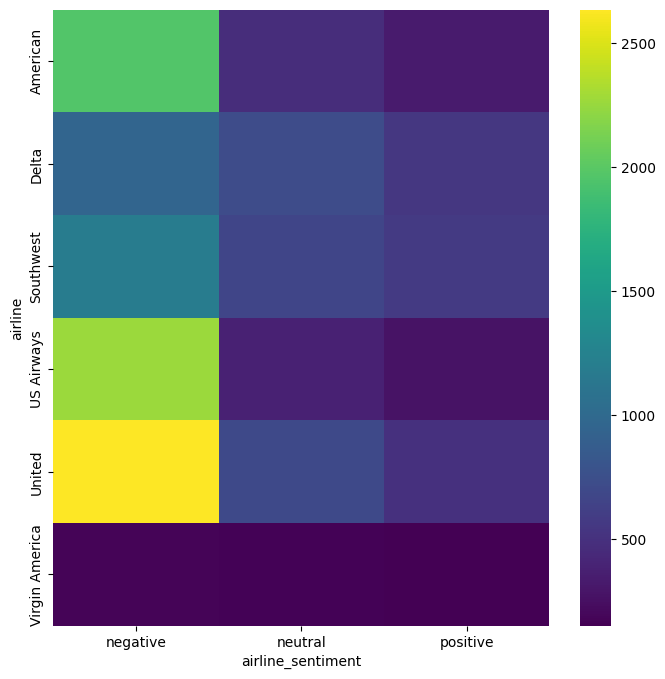

In [ ]:
# @title airline_sentiment vs airline

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['airline'].value_counts()
    for x_label, grp in df.groupby('airline_sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('airline_sentiment')
_ = plt.ylabel('airline')

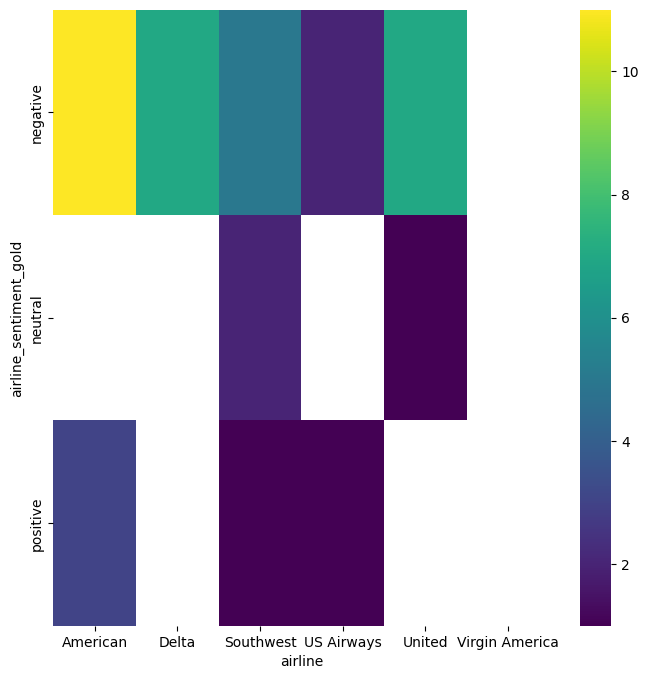

In [ ]:
# @title airline vs airline_sentiment_gold

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['airline_sentiment_gold'].value_counts()
    for x_label, grp in df.groupby('airline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('airline')
_ = plt.ylabel('airline_sentiment_gold')

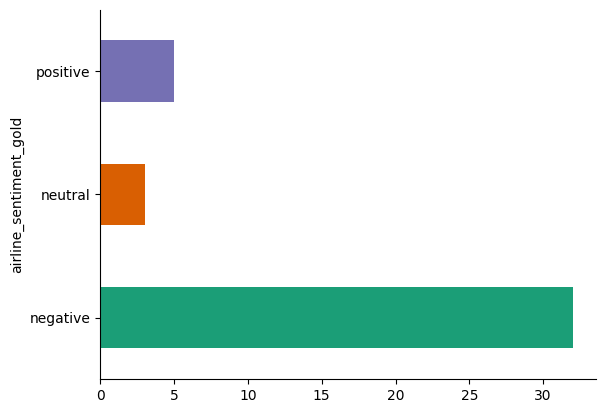

In [ ]:
# @title airline_sentiment_gold

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('airline_sentiment_gold').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

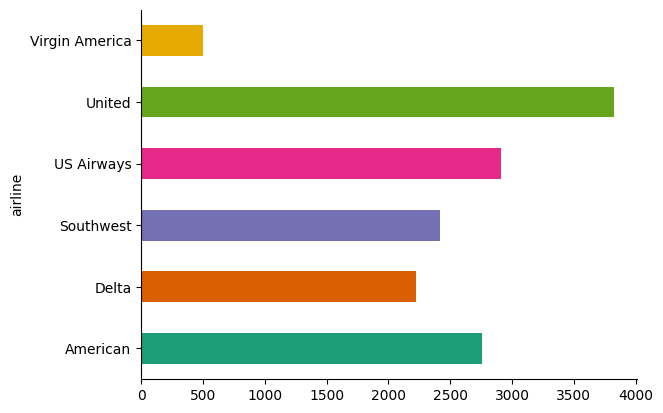

In [ ]:
# @title airline

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('airline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

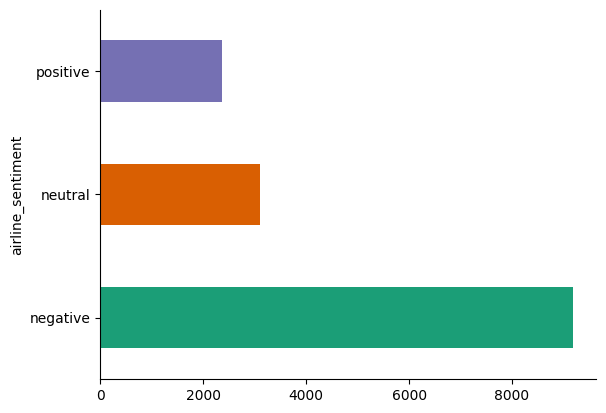

In [ ]:
# @title airline_sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

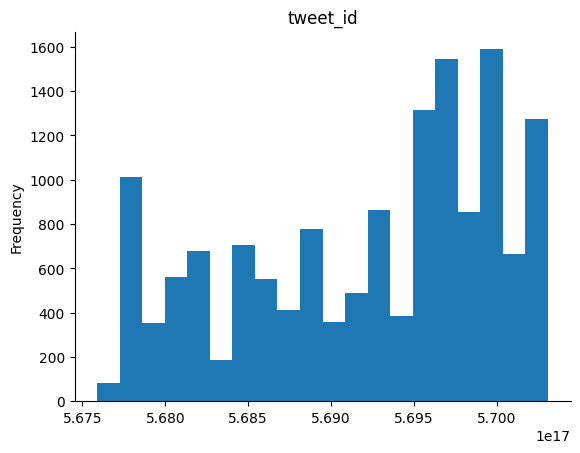

In [ ]:
# @title tweet_id

from matplotlib import pyplot as plt
df['tweet_id'].plot(kind='hist', bins=20, title='tweet_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='airline_sentiment', ylabel='count'>

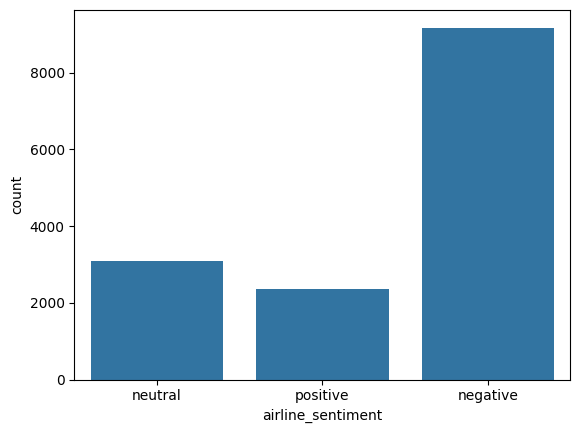

In [ ]:
sn.countplot(x = "airline_sentiment", data = df)

Value counts operation on the 'airline_sentiment' column

In [ ]:
df["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Text Preprocessing Section

In [ ]:
import re
import string
from tqdm.auto import tqdm
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Text Cleaning Functions

In [ ]:
# some text cleaning functions
def convert_to_lower(text):
    return text.lower()

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [ ]:
# Import libraries
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file in Google Drive
file_path = "/content/drive/MyDrive/Tweets.csv"

# Read data from the CSV file
df1 = pd.read_csv(file_path)

# Define functions convert_to_lower, remove_numbers, remove_punctuation, remove_stopwords, remove_extra_white_spaces, and lemmatizing if not already defined

# Apply data preprocessing steps to the 'text' column
df1.loc[:, 'text'] = df1['text'].apply(convert_to_lower)
df1.loc[:, 'text'] = df1['text'].apply(remove_numbers)
df1.loc[:, 'text'] = df1['text'].apply(remove_punctuation)
df1.loc[:, 'text'] = df1['text'].apply(remove_stopwords)
df1.loc[:, 'text'] = df1['text'].apply(remove_extra_white_spaces)
df1.loc[:, 'text'] = df1['text'].apply(lemmatizing)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['airline_sentiment'] = label_encoder.fit_transform(df['airline_sentiment'])

In [ ]:
df1

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,1,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,virginamerica dhepburn said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus youve added commercial expe...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,1,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,virginamerica didnt today must mean need take ...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica really aggressive blast obnoxiou...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,2,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,americanair thank got different flight chicago,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,0,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,americanair leaving minute late flight warning...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,1,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,americanair please bring american airline blac...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,0,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,americanair money change flight dont answer ph...,NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
pip install transformers

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# Split the dataset into train, validation, and test sets
# Split the dataset into train, validation, and test sets
train_data, val_test_data = train_test_split(df1, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=42)

# Extract text and labels from the dataset
train_texts = train_data['text'].tolist()
train_labels = train_data['airline_sentiment'].tolist()
val_texts = val_data['text'].tolist()
val_labels = val_data['airline_sentiment'].tolist()
test_texts = test_data['text'].tolist()
test_labels = test_data['airline_sentiment'].tolist()

# Set the device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
df1["airline_sentiment"].value_counts()

airline_sentiment
0    9178
1    3099
2    2363
Name: count, dtype: int64

In [ ]:
# Initialize the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Tokenize and convert text data to tensors
def tokenize_and_encode(texts, labels, tokenizer):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=128,  # Adjust as needed
            padding="max_length",
            truncation=True,
            return_tensors="pt",
            return_attention_mask=True,
        )
        input_ids.append(encoded_dict["input_ids"])
        attention_masks.append(encoded_dict["attention_mask"])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels)
    return TensorDataset(input_ids, attention_masks, labels)

In [ ]:
# Create DataLoader for training, validation, and test sets
train_dataset = tokenize_and_encode(train_texts, train_labels, tokenizer)
val_dataset = tokenize_and_encode(val_texts, val_labels, tokenizer)
test_dataset = tokenize_and_encode(test_texts, test_labels, tokenizer)

In [ ]:
batch_size = 32  # Adjust as needed
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 10

# Define training parameters
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_dataloader) * num_epochs,
)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 10  # Adjust as needed
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping to prevent exploding gradients
        optimizer.step()
        scheduler.step()

    # Validation
    model.eval()
    val_predictions = []
    val_true_labels = []

    with torch.no_grad():
        for batch in val_dataloader:
            batch = tuple(t.to(device) for t in batch)
            input_ids, attention_mask, labels = batch

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            val_predictions.extend(preds.tolist())
            val_true_labels.extend(labels.tolist())

    val_accuracy = accuracy_score(val_true_labels, val_predictions)
    print(f"Epoch {epoch + 1}/{num_epochs} - Validation Accuracy: {val_accuracy}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), "best_bert_model.pt")

# Load the best model and evaluate on the test set
model.load_state_dict(torch.load("best_bert_model.pt"))
model.eval()

test_predictions = []
test_true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        batch = tuple(t.to(device) for t in batch)
        input_ids, attention_mask, labels = batch

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        test_predictions.extend(preds.tolist())
        test_true_labels.extend(labels.tolist())

test_accuracy = accuracy_score(test_true_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Optional: Print classification report for more detailed evaluation
class_names = ["negative","neutral","positive"]  # Define your 3 sentiment types
report = classification_report(test_true_labels, test_predictions, target_names=class_names)
print(report)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10 - Validation Accuracy: 0.8032786885245902
Epoch 2/10 - Validation Accuracy: 0.8162568306010929
Epoch 3/10 - Validation Accuracy: 0.8155737704918032
Epoch 4/10 - Validation Accuracy: 0.8046448087431693
Epoch 5/10 - Validation Accuracy: 0.8135245901639344
Epoch 6/10 - Validation Accuracy: 0.8046448087431693
Epoch 7/10 - Validation Accuracy: 0.8073770491803278
Epoch 8/10 - Validation Accuracy: 0.8039617486338798
Epoch 9/10 - Validation Accuracy: 0.8073770491803278
Epoch 10/10 - Validation Accuracy: 0.8101092896174863
Test Accuracy: 0.8299180327868853
              precision    recall  f1-score   support

    negative       0.88      0.92      0.90       959
     neutral       0.69      0.60      0.64       293
    positive       0.78      0.76      0.77       212

    accuracy                           0.83      1464
   macro avg       0.78      0.76      0.77      1464
weighted avg       0.82      0.83      0.83      1464



#visualizations

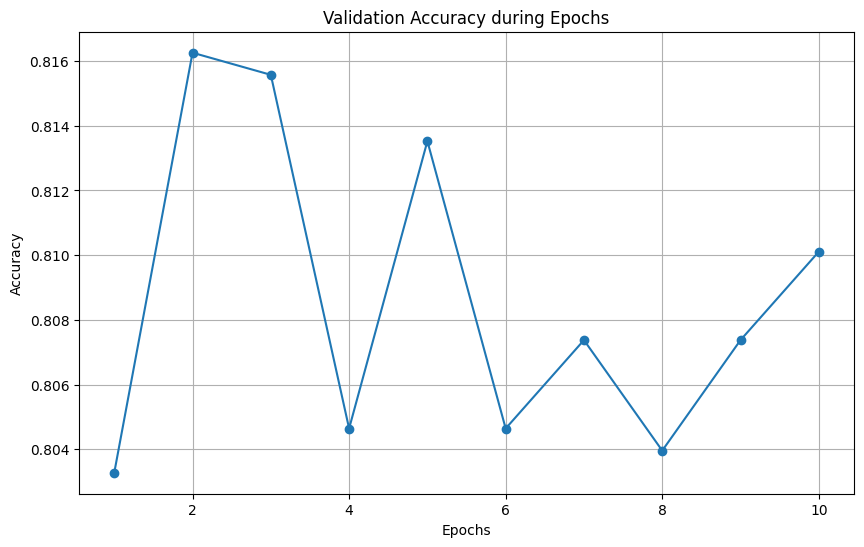

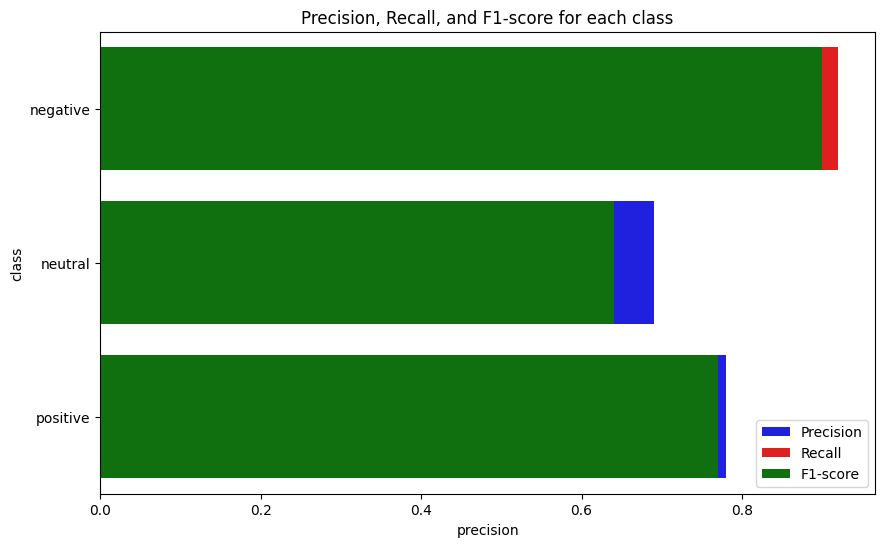

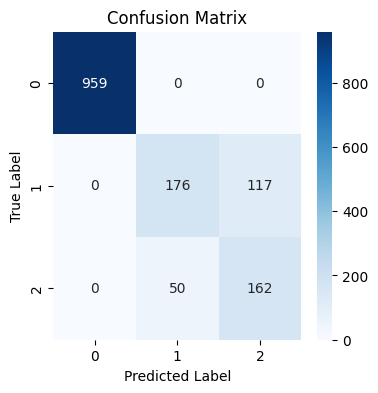

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# Example values
validation_accuracy = [0.8032786885245902, 0.8162568306010929, 0.8155737704918032, 0.8046448087431693, 0.8135245901639344, 0.8046448087431693, 0.8073770491803278, 0.8039617486338798, 0.8073770491803278, 0.8101092896174863]
test_accuracy = 0.8299180327868853
classification_rep = """
              precision    recall  f1-score   support

    negative       0.88      0.92      0.90       959
     neutral       0.69      0.60      0.64       293
    positive       0.78      0.76      0.77       212

    accuracy                           0.83      1464
   macro avg       0.78      0.76      0.77      1464
weighted avg       0.82      0.83      0.83      1464
"""

# Plot validation accuracy during epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, marker='o')
plt.title('Validation Accuracy during Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Parse classification report
class_rep = classification_rep.split('\n')[2:-5]  # Exclude header and footer
data = []
for line in class_rep:
    row_data = line.split()
    data.append(row_data)

# Create DataFrame for classification report
df = pd.DataFrame(data, columns=['class', 'precision', 'recall', 'f1-score', 'support'])

# Plot precision, recall, and f1-score for each class
plt.figure(figsize=(10, 6))
df[['precision', 'recall', 'f1-score', 'support']] = df[['precision', 'recall', 'f1-score', 'support']].astype(float)
sns.barplot(data=df, x='precision', y='class', color='blue', label='Precision')
sns.barplot(data=df, x='recall', y='class', color='red', label='Recall')
sns.barplot(data=df, x='f1-score', y='class', color='green', label='F1-score')
plt.title('Precision, Recall, and F1-score for each class')
plt.legend()
plt.show()

# Calculate confusion matrix
confusion_matrix_data = [[959, 0, 0], [0, 176, 117], [0, 50, 162]]  # Example confusion matrix data

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
